# Flight Delay: Exploratory Data Analysis

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../df_preprocessed.csv', index_col=0)
df.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,...,Carrier_ID(DOT),Tail_Number,Delay,Time,concat_date,Origin_Region,Destination_Region,Season,EDT_Part_of_Day,EAT_Part_of_Day
0,TRAIN_000006,1,20,1742.0,1903.0,EWR,11618,New Jersey,BOS,10721,...,19977.0,N66825,0,81,20,Northeast,Northeast,Winter,Evening,Evening
1,TRAIN_000008,6,13,1420.0,1550.0,BWI,10821,Maryland,CLT,11057,...,19393.0,N765SW,0,90,164,Northeast,Southeast,Summer,Evening,Evening
2,TRAIN_000010,8,13,1730.0,1844.0,DCA,11278,Virginia,PIT,14122,...,20452.0,N119HQ,1,74,225,Southeast,Northeast,Summer,Evening,Evening
3,TRAIN_000012,1,12,1015.0,1145.0,CLE,11042,Ohio,DEN,11292,...,19393.0,N8696E,0,90,12,Ohio_Valley,Southwest,Winter,Afternoon,Evening
4,TRAIN_000013,9,19,615.0,706.0,MAF,13158,Texas,DEN,11292,...,20304.0,N165SY,0,51,262,South,Southwest,Autumn,Morning,Morning


## Label 불균형 확인

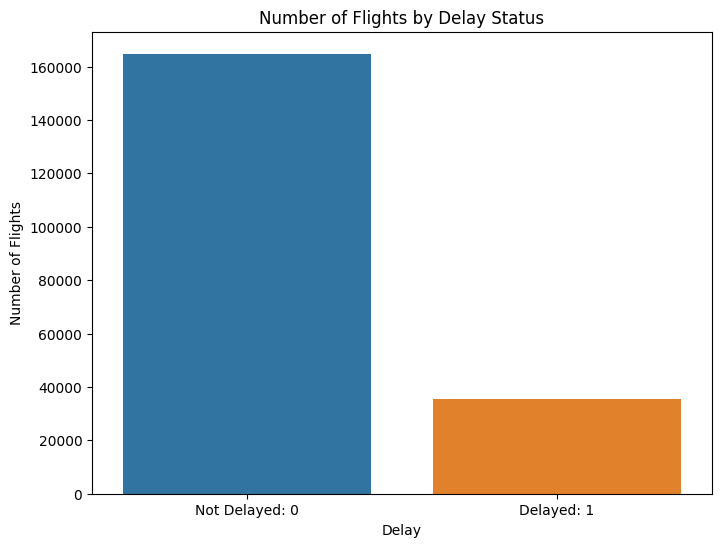

In [3]:
delay_counts = df['Delay'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=delay_counts.index, y=delay_counts.values)
plt.xticks([0, 1], ['Not Delayed: 0', 'Delayed: 1'])
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Delay Status')
plt.show()

In [4]:
df.Delay.value_counts()

Delay
0    164817
1     35304
Name: count, dtype: int64

## 항공사 별 비행 지연 비율 확인

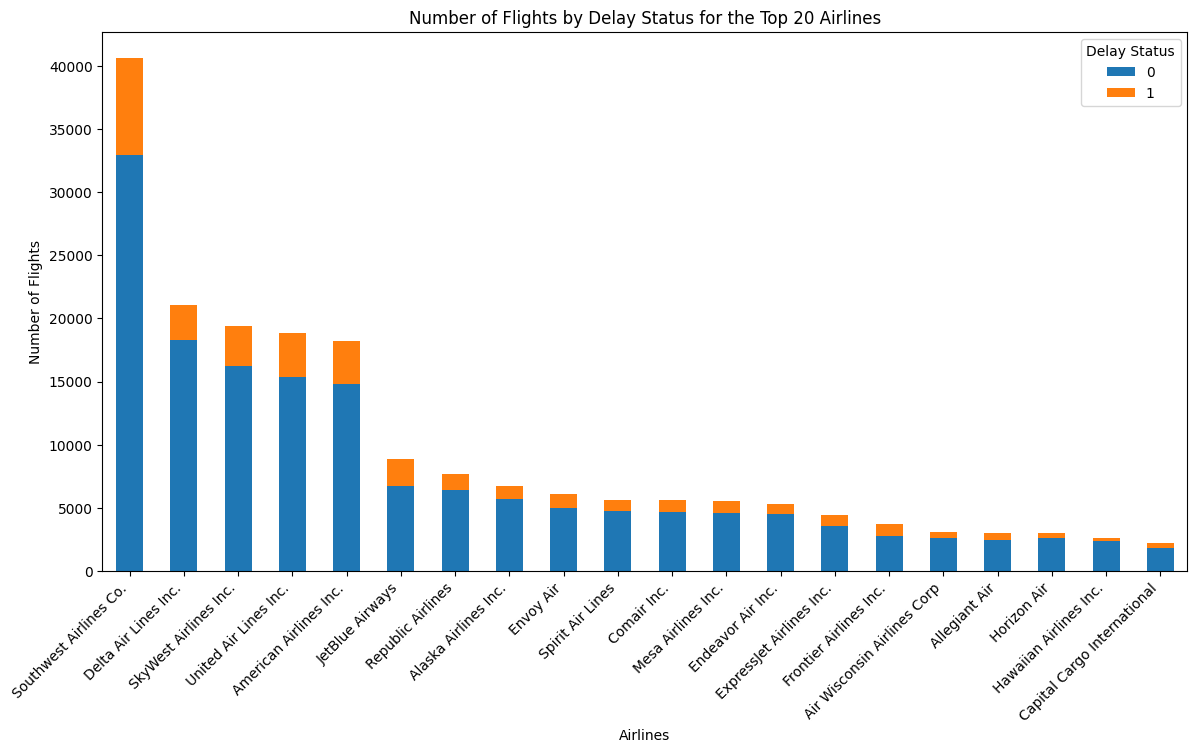

In [5]:
airline_delay = df.groupby(['Airline', 'Delay'])['ID'].count().unstack().fillna(0)

top_airlines = airline_delay.sum(axis=1).sort_values(ascending=False).head(20).index
top_airline_data = airline_delay.loc[top_airlines]

# Plotting
top_airline_data.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Number of Flights by Delay Status for the Top 20 Airlines')
plt.ylabel('Number of Flights')
plt.xlabel('Airlines')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delay Status')
plt.show()


## 비행과 지연이 잦은 주(State)

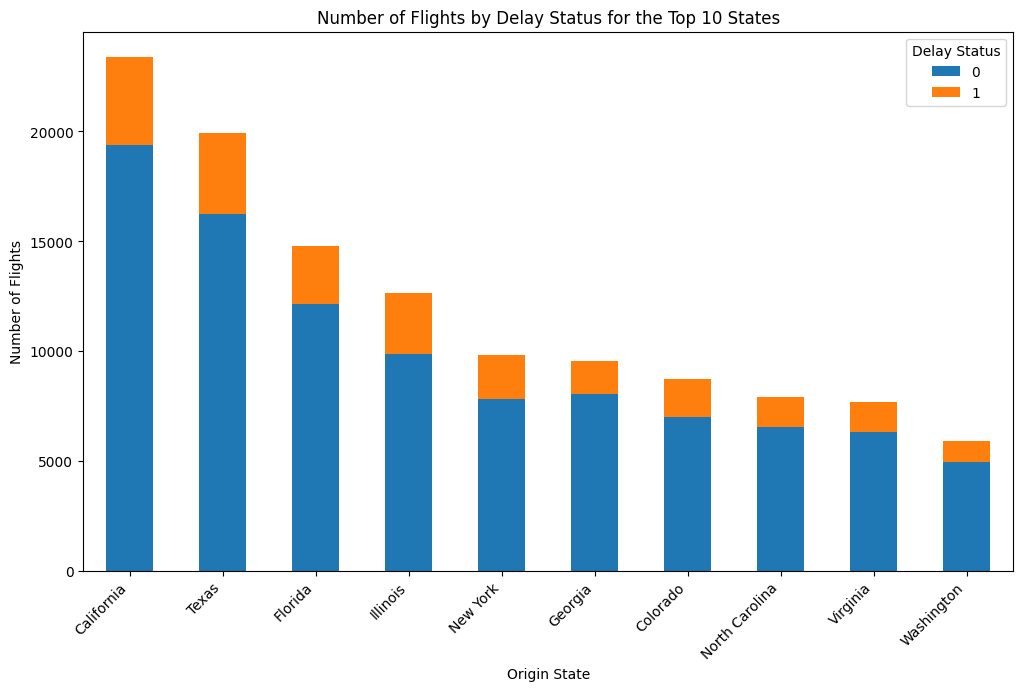

In [6]:
state_delay = df.groupby(['Origin_State', 'Delay'])['ID'].count().unstack().fillna(0)

sorted_states = state_delay.sum(axis=1).sort_values(ascending=False).index
sorted_state_data = state_delay.loc[sorted_states]

top_states = state_delay.sum(axis=1).sort_values(ascending=False).head(10).index
top_state_data = state_delay.loc[top_states]

# Plotting
top_state_data.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Number of Flights by Delay Status for the Top 10 States')
plt.ylabel('Number of Flights')
plt.xlabel('Origin State')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delay Status')
plt.show()


## 비행과 지연이 잦은 지역(Region)

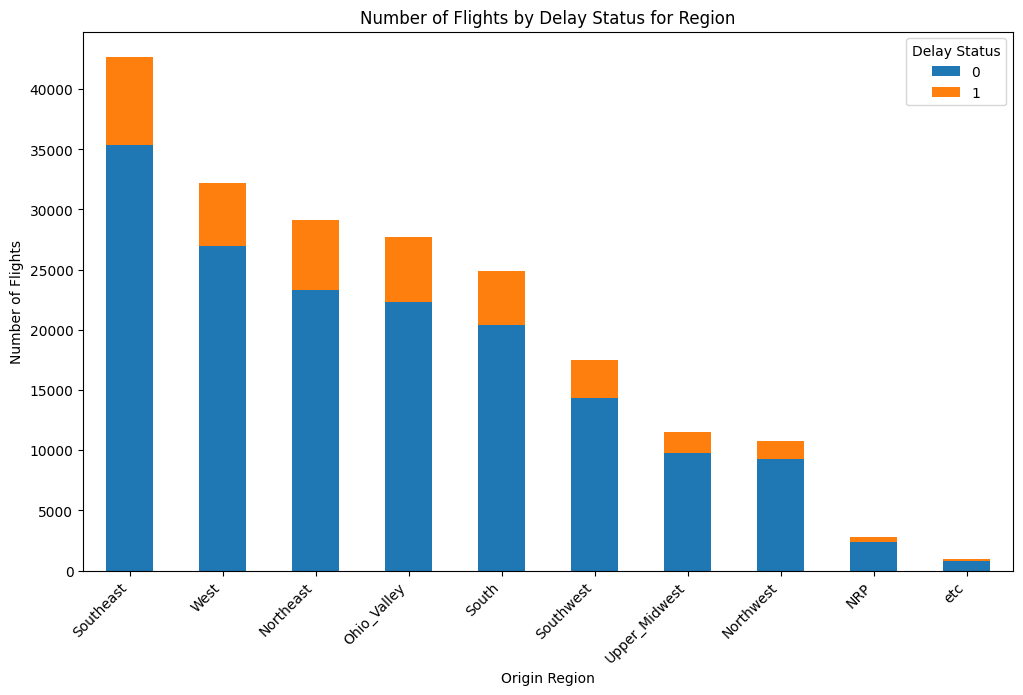

In [7]:
region_delay = df.groupby(['Origin_Region', 'Delay'])['ID'].count().unstack().fillna(0)

sorted_regions = region_delay.sum(axis=1).sort_values(ascending=False).index
sorted_region_data = region_delay.loc[sorted_regions]

# Plotting
sorted_region_data.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Number of Flights by Delay Status for Region')
plt.ylabel('Number of Flights')
plt.xlabel('Origin Region')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delay Status')
plt.show()


## 계절 별 비행 지연

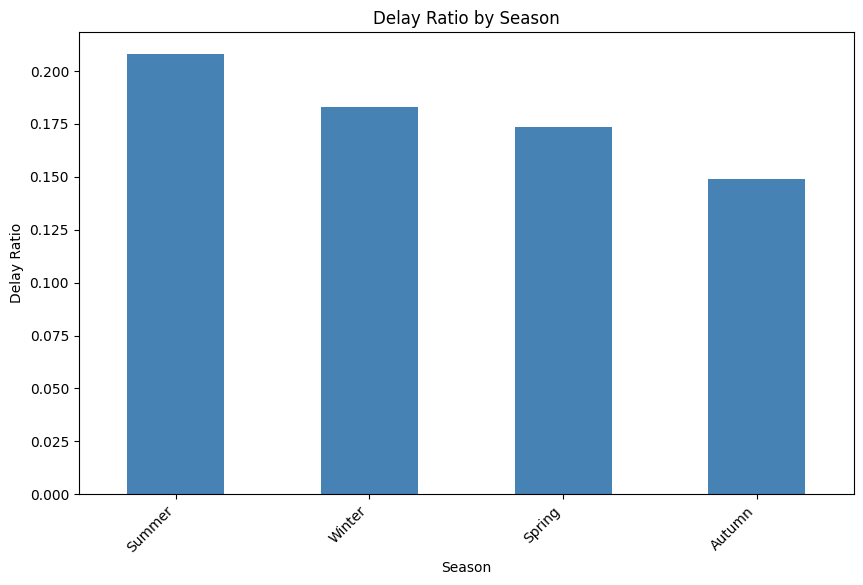

In [8]:
season_total = df.groupby('Season')['ID'].count()
season_delayed = df[df['Delay'] == 1].groupby('Season')['ID'].count()
season_delay_ratio = season_delayed / season_total

plt.figure(figsize=(10, 6))
season_delay_ratio.sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Delay Ratio by Season')
plt.ylabel('Delay Ratio')
plt.xlabel('Season')
plt.xticks(rotation=45, ha='right')
plt.show()

## 시간대별 지연 비율

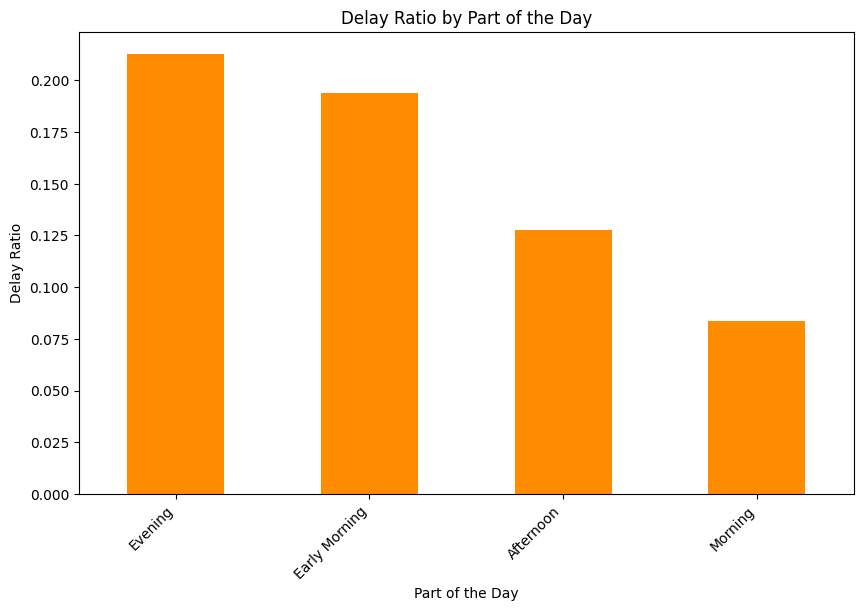

In [9]:
part_of_day_total = df.groupby('EDT_Part_of_Day')['ID'].count()
part_of_day_delayed = df[df['Delay'] == 1].groupby('EDT_Part_of_Day')['ID'].count()
part_of_day_delay_ratio = part_of_day_delayed / part_of_day_total

plt.figure(figsize=(10, 6))
part_of_day_delay_ratio.sort_values(ascending=False).plot(kind='bar', color='darkorange')
plt.title('Delay Ratio by Part of the Day')
plt.ylabel('Delay Ratio')
plt.xlabel('Part of the Day')
plt.xticks(rotation=45, ha='right')
plt.show()
